# EDA for ETL Process

In [2]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Forecast Files

### Grid 2.5km

In [3]:
forecast_files = os.listdir('forecasts/2.5')

def is_csv(x):
    if x[-4:] == '.csv':
        return True
    return False

forecast_files = list(filter(is_csv, forecast_files))

forecast_files.sort()

In [4]:
forecast_files

['forecasts_2_5_km_0.csv',
 'forecasts_2_5_km_1.csv',
 'forecasts_2_5_km_10.csv',
 'forecasts_2_5_km_11.csv',
 'forecasts_2_5_km_12.csv',
 'forecasts_2_5_km_13.csv',
 'forecasts_2_5_km_14.csv',
 'forecasts_2_5_km_15.csv',
 'forecasts_2_5_km_16.csv',
 'forecasts_2_5_km_17.csv',
 'forecasts_2_5_km_18.csv',
 'forecasts_2_5_km_19.csv',
 'forecasts_2_5_km_2.csv',
 'forecasts_2_5_km_20.csv',
 'forecasts_2_5_km_21.csv',
 'forecasts_2_5_km_3.csv',
 'forecasts_2_5_km_4.csv',
 'forecasts_2_5_km_5.csv',
 'forecasts_2_5_km_6.csv',
 'forecasts_2_5_km_7.csv',
 'forecasts_2_5_km_8.csv',
 'forecasts_2_5_km_9.csv']

In [5]:
len(forecast_files)

22

In [6]:
def read_all_files(path, files):
    df = pd.DataFrame()
    for arquivo in files:
        df_aux = pd.read_csv(f'{path}/{arquivo}')
        df = df.append(df_aux)

    return df

In [7]:
forecasts = pd.DataFrame()

for arquivo in forecast_files:
    df_aux = pd.read_csv(f'forecasts/2.5/{arquivo}')
    forecasts = forecasts.append(df_aux)



In [8]:
forecasts

,nearest_forecast_long,nearest_forecast_lat,long,station_id,lat,forecast,indexes,year,month,day,hour
0,10.738135,59.946386,10.7200,SN18700,59.9423,267.546997,[319 314],2019.0,1.0,31,18
1,13.627744,66.909166,13.6460,SN80740,66.9035,268.538208,[626 385],2019.0,1.0,31,18
2,8.178909,62.253197,8.2000,SN61630,62.2583,264.514771,[426 268],2019.0,1.0,31,18
3,12.318575,64.690575,12.3295,SN78910,64.6933,262.824341,[528 358],2019.0,1.0,31,18
4,11.098430,61.420746,11.0803,SN8140,61.4255,261.482544,[384 326],2019.0,1.0,31,18
...,...,...,...,...,...,...,...,...,...,...,...
147795,6.572572,61.914556,6.5585,SN58900,61.9157,279.479767,[415 233],2020.0,5.0,13,12
147796,17.247835,68.379074,17.2438,SN84380,68.3710,267.085236,[692 446],2020.0,5.0,13,12
147797,11.337268,62.575780,11.3518,SN10380,62.5773,277.539337,[435 334],2020.0,5.0,13,12
147798,26.148085,69.757811,26.1457,SN97120,69.7563,274.860626,[768 581],2020.0,5.0,13,12


In [9]:
forecasts.year.unique()

array([2019., 2020., 2021.])

In [10]:
forecasts.year.value_counts()

2020.0    1078201
2021.0    1077462
2019.0    1068594
Name: year, dtype: int64

In [11]:
forecasts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3224257 entries, 0 to 147799
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   nearest_forecast_long  float64
 1   nearest_forecast_lat   float64
 2   long                   float64
 3   station_id             object 
 4   lat                    float64
 5   forecast               float64
 6   indexes                object 
 7   year                   float64
 8   month                  float64
 9   day                    int64  
 10  hour                   int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 295.2+ MB


In [12]:
to_transform = ['year', 'month', 'day', 'hour']

for item in to_transform:
    forecasts = forecasts.astype({item: 'int32'})


In [13]:
forecasts.hour.unique()

array([18, 12,  6,  0], dtype=int32)

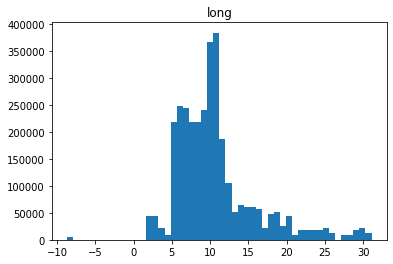

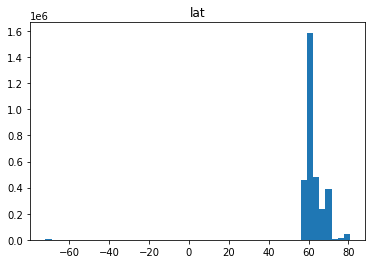

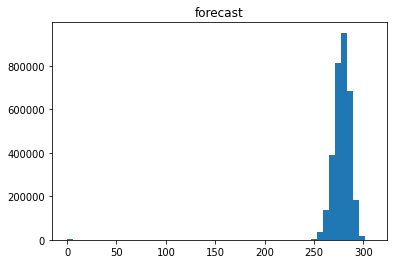

In [14]:
column_list = ['long', 'lat', 'forecast']
for column in column_list:
    plt.figure()
    plt.title(column)
    plt.hist(forecasts[column], bins=50)
    plt.show()

In [15]:
def kelvin_to_celsius(k):
    return k - 273

forecasts['forecast'] = forecasts['forecast'].apply(lambda x: kelvin_to_celsius(x))

In [16]:
# forecasts.apply(lambda x: np.datetime64([x['year'], x['month']]), axis=1)

In [17]:
forecasts.head()

,nearest_forecast_long,nearest_forecast_lat,long,station_id,lat,forecast,indexes,year,month,day,hour
0,10.738135,59.946386,10.7200,SN18700,59.9423,-5.453003,[319 314],2019,1,31,18
1,13.627744,66.909166,13.6460,SN80740,66.9035,-4.461792,[626 385],2019,1,31,18
2,8.178909,62.253197,8.2000,SN61630,62.2583,-8.485229,[426 268],2019,1,31,18
3,12.318575,64.690575,12.3295,SN78910,64.6933,-10.175659,[528 358],2019,1,31,18
4,11.098430,61.420746,11.0803,SN8140,61.4255,-11.517456,[384 326],2019,1,31,18


### Grid 1km

In [18]:
gridpp_files = os.listdir('forecasts/1')

gridpp_files = list(filter(is_csv, gridpp_files))

gridpp_files.sort()

gridpp = pd.DataFrame()

for arquivo in gridpp_files:
    df_aux = pd.read_csv(f'forecasts/1/{arquivo}')
    gridpp = gridpp.append(df_aux)

del df_aux

In [19]:
gridpp.head()

,long,lat,nearest_gridpp_long,forecast,station_id,nearest_gridpp_lat,indexes,year,month,day,hour,nearest_forecast_lat,nearest_forecast_long
0,10.7200,59.9423,10.721601,268.350006,SN18700,59.941412,[772 659],2019.0,1.0,31,18,NaN,NaN
1,13.6460,66.9035,13.640646,267.450012,SN80740,66.900377,[1539 838],2019.0,1.0,31,18,NaN,NaN
2,8.2000,62.2583,8.198928,264.750000,SN61630,62.254266,[1040 546],2019.0,1.0,31,18,NaN,NaN
3,12.3295,64.6933,12.319475,263.104156,SN78910,64.690668,[1295 770],2019.0,1.0,31,18,NaN,NaN
4,11.0803,61.4255,11.079327,263.049988,SN8140,61.429274,[936 689],2019.0,1.0,31,18,NaN,NaN


In [20]:
gridpp.drop(columns=['nearest_forecast_lat', 'nearest_forecast_long'], inplace=True)

In [21]:
gridpp.year.value_counts()

2021.0    1075245
2020.0    1071550
2019.0    1045685
Name: year, dtype: int64

In [22]:
gridpp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3192480 entries, 0 to 147799
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   long                 float64
 1   lat                  float64
 2   nearest_gridpp_long  float64
 3   forecast             float64
 4   station_id           object 
 5   nearest_gridpp_lat   float64
 6   indexes              object 
 7   year                 float64
 8   month                float64
 9   day                  int64  
 10  hour                 int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 292.3+ MB


In [23]:
to_transform = ['year', 'month', 'day', 'hour']

for item in to_transform:
    gridpp = gridpp.astype({item: 'int32'})

In [24]:

gridpp['forecast'] = gridpp['forecast'].apply(lambda x: kelvin_to_celsius(x))

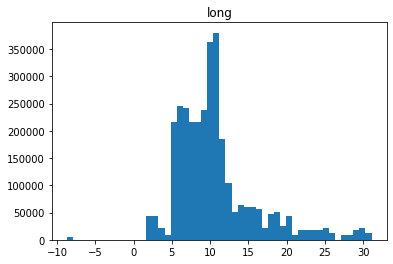

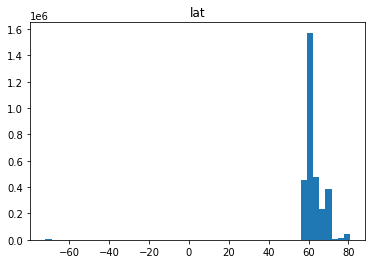

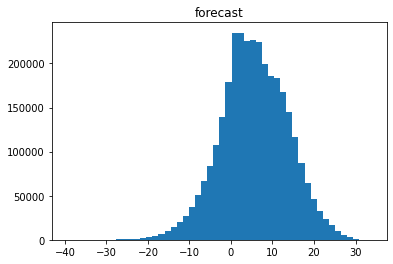

In [25]:
column_list = ['long', 'lat', 'forecast']
for column in column_list:
    plt.figure()
    plt.title(column)
    plt.hist(gridpp[column], bins=50)
    plt.show()

### Oberservations

In [26]:
observation_files = os.listdir('observation')

observation_files = list(filter(is_csv, observation_files))

observation_files.sort()

In [27]:
observation_files

['observation_2019.csv', 'observation_2020.csv', 'observation_2021.csv']

In [28]:
observations = read_all_files('observation', observation_files)

In [29]:
observations.reset_index(drop=True, inplace=True)
observations.head()

,sourceId,referenceTime,observations
0,SN18700:0,2019-01-01T00:00:00.000Z,[{'value': 2}]
1,SN18700:0,2019-01-01T01:00:00.000Z,[{'value': 4.9}]
2,SN18700:0,2019-01-01T02:00:00.000Z,[{'value': 3.1}]
3,SN18700:0,2019-01-01T03:00:00.000Z,[{'value': 3.8}]
4,SN18700:0,2019-01-01T04:00:00.000Z,[{'value': 3.1}]


In [30]:
observations.observations[0]

"[{'value': 2}]"

In [31]:
observations['observations'] = observations['observations'].apply(lambda x: x.split(':'))

In [32]:
re_to_extract_numbers = r'\-*\d+\.*\d*'

In [34]:
observations

,sourceId,referenceTime,observations
0,SN18700:0,2019-01-01T00:00:00.000Z,"[[{'value', 2}]]"
1,SN18700:0,2019-01-01T01:00:00.000Z,"[[{'value', 4.9}]]"
2,SN18700:0,2019-01-01T02:00:00.000Z,"[[{'value', 3.1}]]"
3,SN18700:0,2019-01-01T03:00:00.000Z,"[[{'value', 3.8}]]"
4,SN18700:0,2019-01-01T04:00:00.000Z,"[[{'value', 3.1}]]"
...,...,...,...
19078870,SN10380:0,2021-12-31T19:00:00.000Z,"[[{'value', -6.4}]]"
19078871,SN10380:0,2021-12-31T20:00:00.000Z,"[[{'value', -6.8}]]"
19078872,SN10380:0,2021-12-31T21:00:00.000Z,"[[{'value', -6.6}]]"
19078873,SN10380:0,2021-12-31T22:00:00.000Z,"[[{'value', -2.1}]]"


In [35]:
observations['observations'] = observations['observations'].apply(lambda x: float(re.findall(re_to_extract_numbers, x[-1])[0]))

In [39]:
observations.head()

,sourceId,referenceTime,observations
0,SN18700:0,2019-01-01T00:00:00.000Z,2.0
1,SN18700:0,2019-01-01T01:00:00.000Z,4.9
2,SN18700:0,2019-01-01T02:00:00.000Z,3.1
3,SN18700:0,2019-01-01T03:00:00.000Z,3.8
4,SN18700:0,2019-01-01T04:00:00.000Z,3.1


In [40]:
observations.to_csv('for_precaution.csv', index=False)